In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, StratifiedKFold


In [2]:
# import dataset
data = arff.loadarff('LargeKitchenAppliances_TEST.arff')
test = pd.DataFrame(data[0])

test.tail()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att712,att713,att714,att715,att716,att717,att718,att719,att720,target
370,-0.097069,-0.097069,-0.097069,-0.097069,-0.097069,-0.097069,-0.097069,-0.097069,-0.097069,-0.097069,...,-0.097069,-0.097069,-0.097069,-0.097069,-0.097069,-0.097069,-0.097069,-0.097069,-0.097069,b'3'
371,-0.064789,-0.064789,-0.064789,-0.064789,-0.064789,-0.064789,-0.064789,-0.064789,-0.064789,-0.064789,...,-0.064789,-0.064789,-0.064789,-0.064789,-0.064789,-0.064789,-0.064789,-0.064789,-0.064789,b'3'
372,-0.141824,-0.141824,-0.141824,-0.141824,-0.141824,-0.141824,-0.141824,-0.141824,-0.141824,-0.141824,...,-0.141824,-0.141824,-0.141824,-0.141824,-0.141824,-0.141824,-0.141824,-0.141824,-0.141824,b'3'
373,-0.123813,-0.123813,-0.123813,-0.123813,-0.123813,-0.123813,-0.123813,-0.123813,-0.123813,-0.123813,...,-0.123813,-0.123813,-0.123813,-0.123813,-0.123813,-0.123813,-0.123813,-0.123813,-0.123813,b'3'
374,-0.171906,-0.171906,-0.171906,-0.171906,-0.171906,-0.163684,-0.171906,-0.171906,-0.171906,-0.171906,...,-0.171906,-0.171906,-0.171906,-0.171906,-0.171906,-0.171906,-0.171906,-0.171906,-0.171906,b'3'


In [3]:
data = arff.loadarff('LargeKitchenAppliances_TRAIN.arff')
train = pd.DataFrame(data[0])

train.tail()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att712,att713,att714,att715,att716,att717,att718,att719,att720,target
370,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,...,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,-0.457814,b'3'
371,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,...,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,-0.312653,b'3'
372,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,...,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,-0.206270,b'3'
373,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,...,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,-0.175033,b'3'
374,-0.131219,-0.131219,-0.131219,-0.131219,-0.131219,-0.131219,-0.131219,-0.131219,-0.131219,-0.131219,...,-0.131219,-0.131219,-0.131219,-0.131219,-0.131219,-0.131219,-0.131219,-0.131219,-0.131219,b'3'


In [4]:
# prepare dataset
y_train = train['target']
X_train = train.drop('target', axis=1)
y_test = test['target']
X_test = test.drop('target', axis=1)

In [5]:
# treat labels column as categorical values
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [6]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(375, 720) (375, 720) (375,) (375,)


In [24]:
# modeling
test_scores = []
train_scores = []

for i in range(1,40):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [33]:
# check train score
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train accuracy score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train accuracy score 100.0 % and k = [1]


In [34]:
# check test score
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test accuracy score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test accuracy score 49.333333333333336 % and k = [1]


C:\Users\Xinhang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Xinhang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


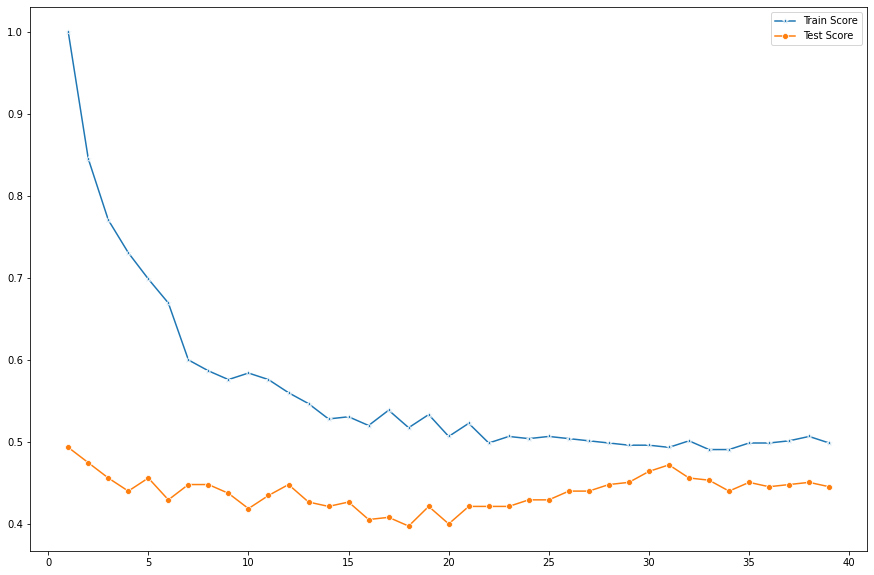

In [29]:
# plot two score together
plt.figure(figsize=(15,10))
p = sns.lineplot(range(1,40),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,40),test_scores,marker='o',label='Test Score')

In [13]:
# Calculating error for K values between 1 and 40
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

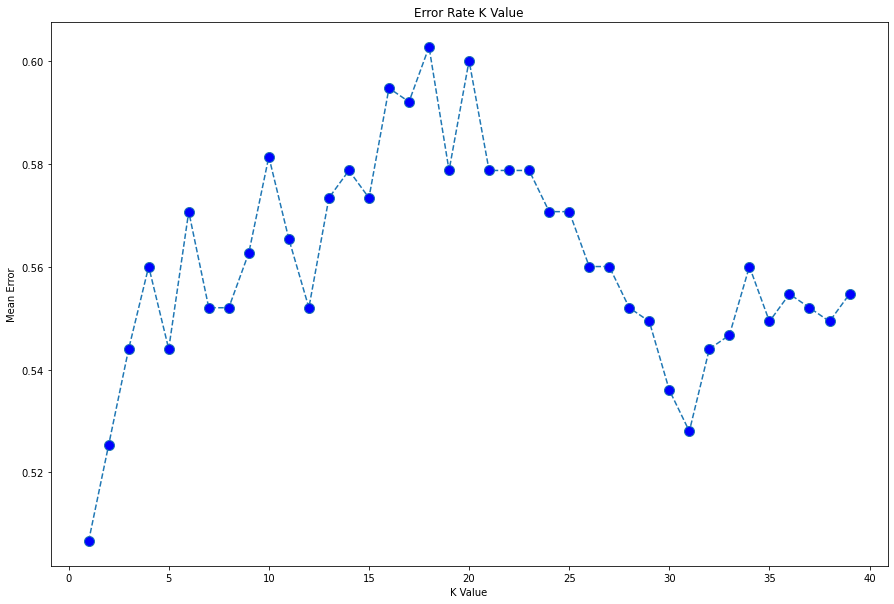

In [16]:
# plot error rate
plt.figure(figsize=(15, 10))
plt.plot(range(1, 40), error, linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')